In [1]:
## Dependencies and Optimization Code
'''
To run this notebook you need a Python 3.11 environment with the following libraries:
- pandas + numpy
- scipy
- matplotlib
- geopandas + shapely
- rasterio
- pulp

The marineplan_demo.py file is the only code used outside of this notebook.

Within this file the run_linear_optimization() function creates a pulp.LpProblem and runs the solve command.
You may need to traceback some of the code and set up to understand how the optimization problem is setup. 

We will help as needed to explain that. See the NOCN Optimization Notes for initial help.
'''

'\nTo run this notebook you need a Python 3.11 environment with the following libraries:\n- pandas + numpy\n- scipy\n- matplotlib\n- geopandas + shapely\n- rasterio\n- pulp\n\nThe marineplan_demo.py file is the only code used outside of this notebook.\n\nWithin this file the run_linear_optimization() function creates a pulp.LpProblem and runs the solve command.\nYou may need to traceback some of the code and set up to understand how the optimization problem is setup. \n\nWe will help as needed to explain that. See the NOCN Optimization Notes for initial help.\n'

In [2]:
# Imports
import os
import sys
from importlib import reload
from pathlib import Path

directory = Path(os.path.abspath(os.getcwd()))
sys.path.append(str(directory))

import marineplan_demo
reload(marineplan_demo)
from marineplan_demo import *

ModuleNotFoundError: No module named 'rasterio'

In [2]:
## Simulation environment

'''
This is a simple example of a simulation environment.

This cell allows for any custimization of the simulation environment,
such as the name of the simulation, the goals, and the technologies to be used.

name: str
    The name of the simulation, and will be used to name the output files.

goals: dict
    Contains any goals/targets/constraints for the simulation.
    See the goals_constraints.txt file for more information.
    Currently just some simple goals are defined as an example.

technologies: dict
    Contains the technologies to be used in the simulation.

    The keys are the names of the technologies, and the values are dictionaries
    with the keys 'present' and 'metric_mods'.

    'present' is a boolean indicating if the technology is to be used.

    'metric_mods' is a dictionary of any modifications to the metrics of the technology.
    To modify a metric, the key is the name of the metric, and the value is a multiplier for the metric.
    For example, to double the CAPEX of a technology, the dictionary would be {'capex': 2}.
    The possible options are ['capex', 'opex', 'value, 'food', 'CO2_emission', CO2_mitigation, 'energy', 'ecosystem_benefits'].
'''

name = 'test'

goals = {
    'monopile_units':   {'min': 260, 'unit': 'turbines'},
    'total_food':      {'min': 1_000_000, 'unit': 'kg/y'},
    'total_capex':   {'target': 8_820_000_000, 'unit': '€/y', 'penalty': 'light'},
}

technologies = {
      'monopile': {'present': True, 'metric_mods': {}},
      'jacket': {'present': False, 'metric_mods': {}},
      'mussel': {'present': True, 'metric_mods': {}},
      'solar': {'present': True, 'metric_mods': {}},
      'monopile + solar': {'present': False, 'metric_mods': {}},
      'monopile + mussel': {'present': False, 'metric_mods': {}}
  }

P = MarinePlan(directory=directory, sim_name=name, sim_env={'goals': goals}, tech_params=technologies)



Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/dpbirge/miniconda3/envs/nocn39/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ts/22bxjv391lnd100k63vt1kp40000gp/T/3e41f60687ab482e951b10056932c06a-pulp.mps -max -sec 10 -timeMode elapsed -branch -printingOptions all -solution /var/folders/ts/22bxjv391lnd100k63vt1kp40000gp/T/3e41f60687ab482e951b10056932c06a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 65816 COLUMNS
At line 358219 RHS
At line 424031 BOUNDS
At line 485536 ENDATA
Problem MODEL has 65811 rows, 61505 columns and 156769 elements
Coin0008I MODEL read with 0 errors
seconds was changed from 1e+100 to 10
Option for timeMode changed from cpu to elapsed
Continuous objective value is -4.30162e+11 - 0.04 seconds
Cgl0002I 39261 variables fixed
Cgl0004I processed model has 3043 rows, 9907 columns (9906 integer (9906 of which binary)) and 29284 elements
Cbc0038I Initial state - 3 

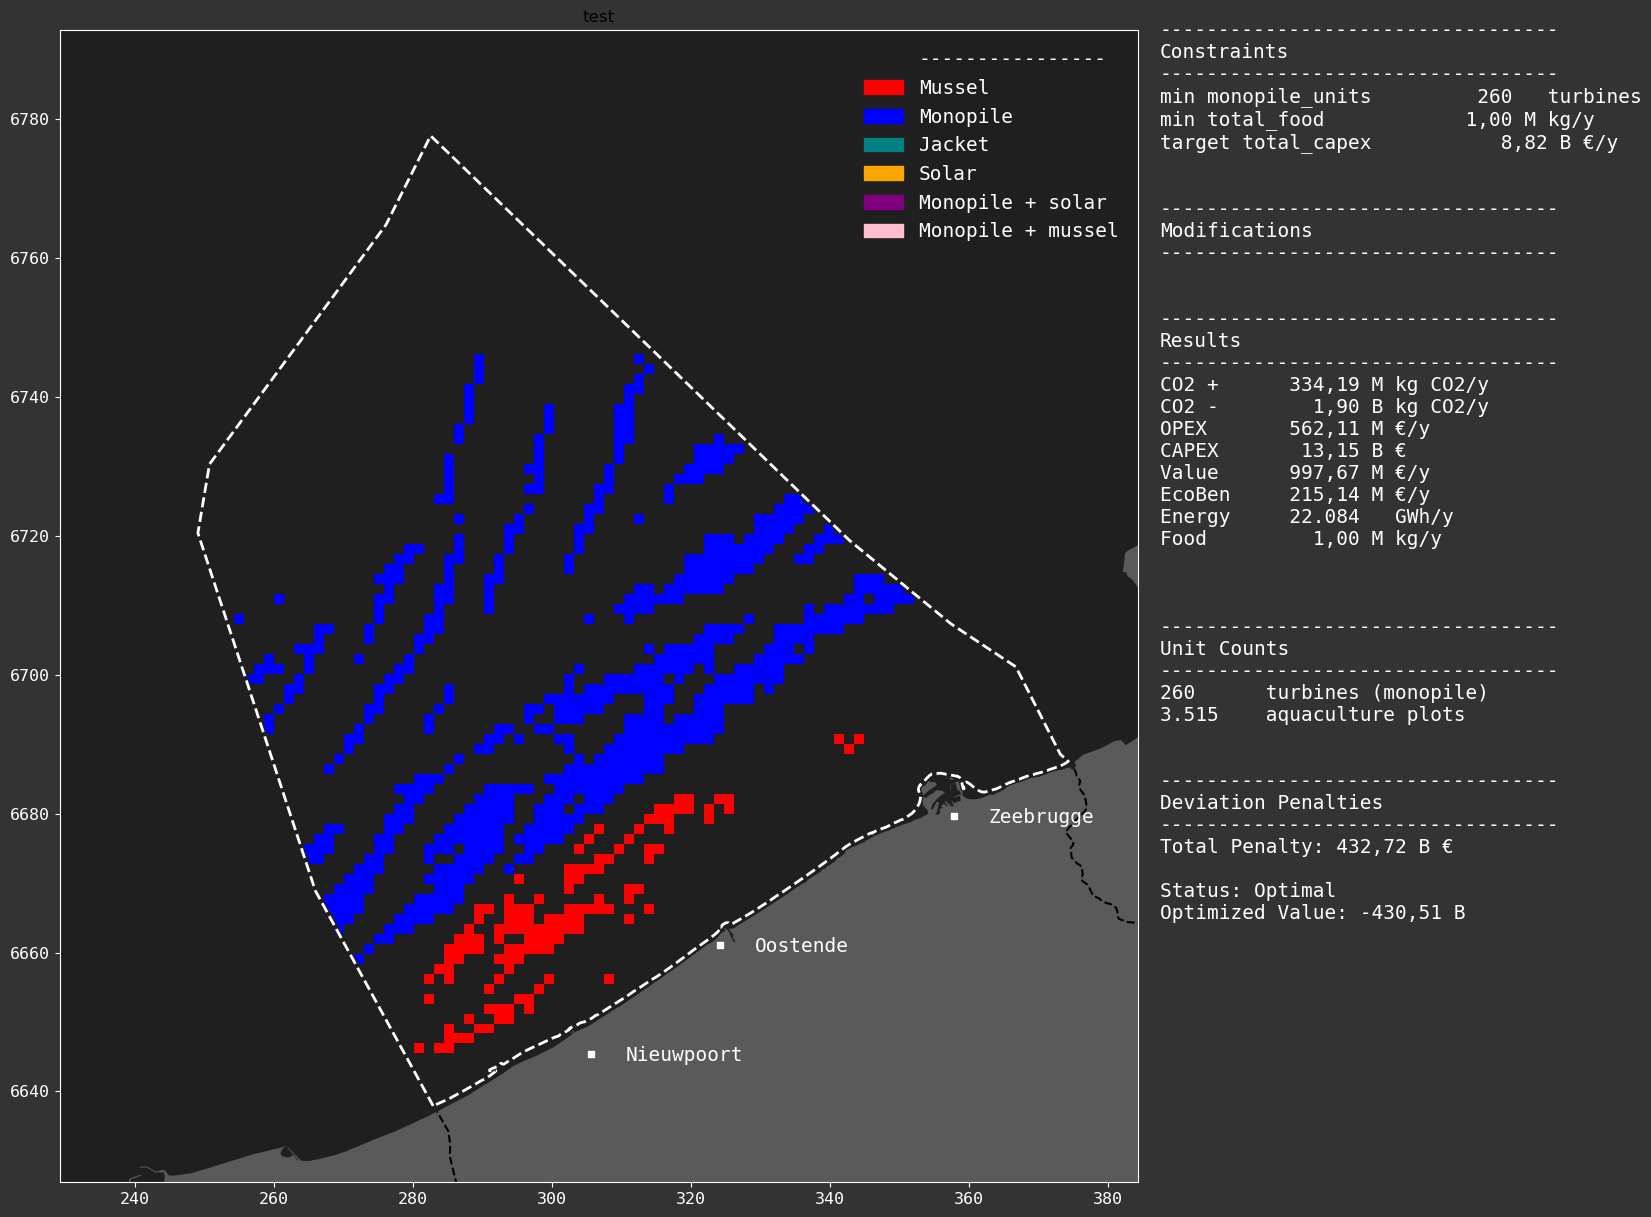

In [3]:
P.prepare_optimization(msg=1)
P.run_linear_optimization(run_optimize=True, min_co2=False)
P.plot_optimal_solution()